# Lab 3: Advanced Data Visualization with 3D Techniques
**Name**: Vandan Amin  
**Dataset**: HCV Blood Donor Dataset (UCI Machine Learning Repository)  
**Objective**: In this lab, we explore the Hepatitis C Virus (HCV) dataset through five meaningful 3D visualizations. These visualizations provide spatial perspectives that make underlying patterns easier to identify and interpret.

## Dataset Overview

The HCV dataset from the UCI Machine Learning Repository contains medical data related to liver function and diagnosis types. It includes values from common liver function tests (e.g., ALT, AST, ALB, GGT, etc.), demographic attributes (Age, Sex), and diagnostic categories ranging from healthy blood donors to those diagnosed with Hepatitis, Fibrosis, or Cirrhosis.

We previously used this dataset in Lab 2 to create Seaborn visualizations. In this lab, we expand our analysis using 3D plots to examine multivariate relationships.

Here is a preview of the cleaned dataset:


In [103]:
import pandas as pd

df = pd.read_csv('hcvdat0.csv')
df_clean = df.drop(columns=['Unnamed: 0'])

diagnosis_map = {
    '0=Blood Donor': 'Blood Donor',
    '0s=suspect Blood Donor': 'Suspect Donor',
    '1=Hepatitis': 'Hepatitis',
    '2=Fibrosis': 'Fibrosis',
    '3=Cirrhosis': 'Cirrhosis'
}
df_clean['Category'] = df_clean['Category'].map(diagnosis_map)
df_clean = df_clean.dropna()
df_clean.head()


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## 1. 3D Scatter Plot: ALT, AST, and GGT by Diagnosis

**Purpose**: This plot visualizes how three liver-related enzyme levels (ALT, AST, GGT) interact across diagnosis categories.  
**Big Takeaway**: It shows that Blood Donors are tightly clustered with low enzyme values, while Cirrhosis and Hepatitis patients have more spread and higher readings, especially in GGT.

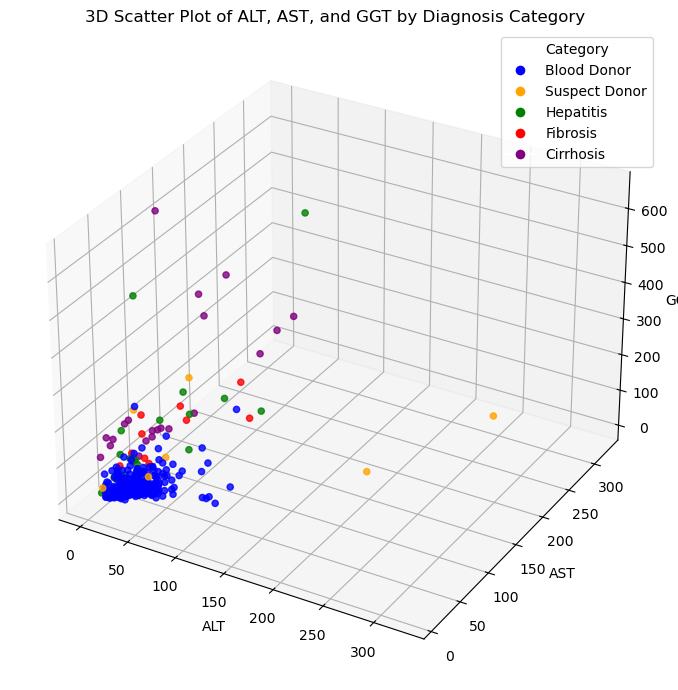

In [106]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

color_map = {
    'Blood Donor': 'blue',
    'Suspect Donor': 'orange',
    'Hepatitis': 'green',
    'Fibrosis': 'red',
    'Cirrhosis': 'purple'
}
colors = df_clean['Category'].map(color_map)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df_clean['ALT'], df_clean['AST'], df_clean['GGT'],
                c=colors, label=df_clean['Category'], alpha=0.8)

ax.set_xlabel('ALT')
ax.set_ylabel('AST')
ax.set_zlabel('GGT')
ax.set_title('3D Scatter Plot of ALT, AST, and GGT by Diagnosis Category')

handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=color, markersize=8)
           for label, color in color_map.items()]
ax.legend(handles=handles, title='Category')

plt.tight_layout()
plt.savefig('VandanAmin_3DScatter_ALT_AST_GGT.png')
plt.show()


## 2. 3D Surface Plot: GGT as a Function of ALT and AST

**Purpose**: This surface plot shows how ALT and AST levels interact to influence GGT levels. GGT is another enzyme commonly used in diagnosing liver conditions.  
**Big Takeaway**: The surface highlights non-linear relationships — certain ALT/AST combinations lead to rapid increases in GGT, especially in cases of liver disease. This suggests a potential compounding effect of elevated enzyme levels on liver stress.


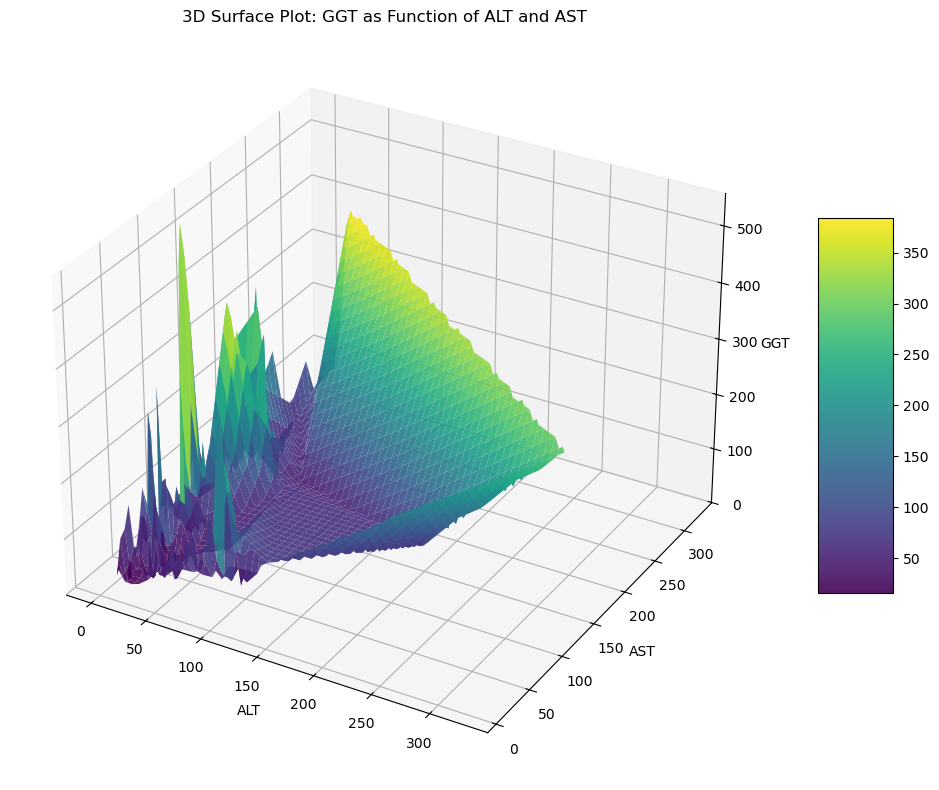

In [109]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

subset = df_clean[['ALT', 'AST', 'GGT']]
x = subset['ALT'].values
y = subset['AST'].values
z = subset['GGT'].values

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='linear')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel('ALT')
ax.set_ylabel('AST')
ax.set_zlabel('GGT')
ax.set_title('3D Surface Plot: GGT as Function of ALT and AST')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.savefig('VandanAmin_Surface_ALT_AST_GGT.png')
plt.show()


## 3. 3D Bar Plot: Patient Distribution by Age Group and Sex

**Purpose**: This visualization shows the count of patients segmented by age group and biological sex.  
**Big Takeaway**: The majority of patients fall within the 30–50 age range, with males being more frequent in almost every group. This helps highlight demographic imbalances in the dataset, potentially impacting diagnostic model fairness.


In [112]:

df_clean = df.drop(columns=['Unnamed: 0']).copy()
df_clean['Category'] = df_clean['Category'].map({
    '0=Blood Donor': 'Blood Donor',
    '0s=suspect Blood Donor': 'Suspect Donor',
    '1=Hepatitis': 'Hepatitis',
    '2=Fibrosis': 'Fibrosis',
    '3=Cirrhosis': 'Cirrhosis'
})
df_clean = df_clean.dropna()
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=[0, 30, 40, 50, 60, 100],
                              labels=['<30', '30-40', '40-50', '50-60', '60+'])

grouped = df_clean.groupby(['AgeGroup', 'Sex', 'Category'], observed=True).size().reset_index(name='Count')
pivoted = grouped.pivot_table(index='AgeGroup', columns='Sex', values='Count', fill_value=0, aggfunc='sum', observed=True)

# Create matrix
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
sex_labels = ['m', 'f']
z1 = np.zeros((len(age_labels), len(sex_labels)))
for i, age in enumerate(age_labels):
    for j, sex in enumerate(sex_labels):
        z1[i, j] = pivoted.loc[age, sex] if sex in pivoted.columns else 0

# Plot bars as 3D meshes
n_rows, n_cols = z1.shape
dx, dy = 0.8, 0.8
traces = []

for i in range(n_rows):
    for j in range(n_cols):
        elevation = z1[i, j]
        x0, x1 = j - dx / 2, j + dx / 2
        y0, y1 = i - dy / 2, i + dy / 2
        vertices = np.array([
            [x0, y0, 0], [x1, y0, 0], [x1, y1, 0], [x0, y1, 0],
            [x0, y0, elevation], [x1, y0, elevation],
            [x1, y1, elevation], [x0, y1, elevation]
        ])
        faces = [[0, 1, 2], [0, 2, 3], [4, 5, 6], [4, 6, 7],
                 [0, 1, 5], [0, 5, 4], [1, 2, 6], [1, 6, 5],
                 [2, 3, 7], [2, 7, 6], [3, 0, 4], [3, 4, 7]]
        i_faces, j_faces, k_faces = zip(*faces)
        intensity = [0]*4 + [elevation]*4

        traces.append(go.Mesh3d(
            x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2],
            i=i_faces, j=j_faces, k=k_faces,
            intensity=intensity,
            intensitymode='vertex',
            colorscale='Ice',
            cmin=z1.min(),
            cmax=z1.max(),
            showscale=False,
            opacity=0.95,
            hovertemplate=f"Sex: {sex_labels[j]}<br>Age Group: {age_labels[i]}<br>Count: {elevation}<extra></extra>",
            name=''
        ))

# Layout and display
fig = go.Figure(data=traces)
fig.update_layout(
    title="3D Bar Plot: Patient Distribution by Age Group and Sex - Vandan Amin",
    scene=dict(
        xaxis=dict(title='Sex', tickvals=[0, 1], ticktext=sex_labels),
        yaxis=dict(title='Age Group', tickvals=list(range(len(age_labels))), ticktext=age_labels),
        zaxis=dict(title='Patient Count'),
        camera_eye=dict(x=1.2, y=1.2, z=1.2)
    ),
    width=800,
    height=750,
    margin=dict(l=0, r=0, b=0, t=50)
)
fig.show()


## 4. 3D Wireframe Plot: ALT, AST, and BIL Across Patients

**Purpose**: This visualization examines trends in three key liver function metrics (ALT, AST, and Bilirubin) across a subset of 100 patients.  
**Big Takeaway**: The plot reveals fluctuations and overlaps between enzyme levels. AST and ALT often track together, while BIL varies more independently — suggesting different diagnostic roles for these features.


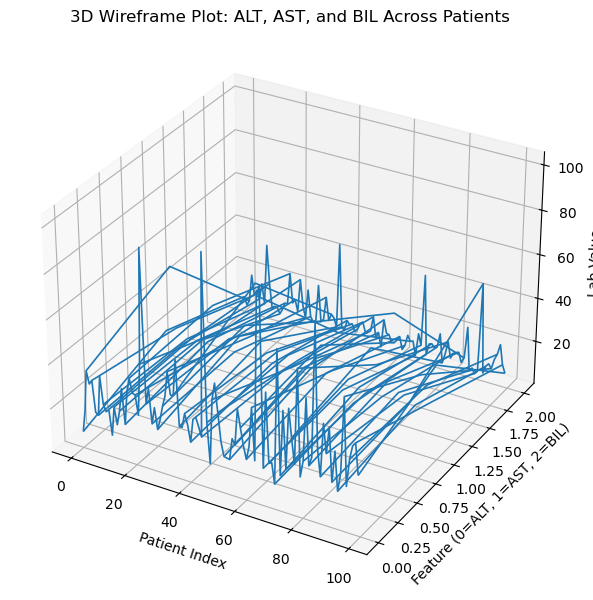

In [115]:
subset_df = df_clean[['ALT', 'AST', 'BIL']].iloc[:100]

x = np.arange(subset_df.shape[0])  # patient index
y = np.arange(subset_df.shape[1])  # feature index (ALT, AST, BIL)
x_grid, y_grid = np.meshgrid(x, y)
z = subset_df.T.values  # shape: (3, 100)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(x_grid, y_grid, z, rstride=2, cstride=2, linewidth=1.2)

ax.set_xlabel('Patient Index')
ax.set_ylabel('Feature (0=ALT, 1=AST, 2=BIL)')
ax.set_zlabel('Lab Value')
ax.set_title('3D Wireframe Plot: ALT, AST, and BIL Across Patients')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
plt.savefig('VandanAmin_Wireframe_ALT_AST_BIL.png')
plt.show()


## 5. 3D Bubble Plot: Age, Cholesterol, Creatinine with Protein Size

**Purpose**: Adds protein level as a bubble size to visualize four dimensions: Age, CHOL, CREA, and PROT.

**Big Takeaway**:  Larger bubbles (more protein) are often linked with disease states. Blood donors again form a consistent base, while Fibrosis and Cirrhosis cases show higher variation in creatinine and cholesterol. The extra dimension helps highlight metabolic imbalances.


In [133]:

df['PROT_scaled'] = (df['PROT'] - df['PROT'].min()) * 5  # Amplify size variation
fig = px.scatter_3d(
    df,
    x='Age', y='CHOL', z='CREA',
    size='PROT_scaled',
    color='Category',
    title='Age vs Cholesterol vs Creatinine (Bubble = Protein Level)',
    labels={'CHOL': 'Cholesterol', 'CREA': 'Creatinine', 'PROT': 'Protein'}
)
fig.show()

